In [1]:
# csv 파일 주소
data_csv_url = './csv_data/emotion_data3.csv'

# split train_ds, validation_ds, test_ds

In [2]:
import pandas as pd

In [3]:
data_pd = pd.read_csv(data_csv_url)

data_pd.head(20)

,Unnamed: 0,Sentence,test
0,0,언니 동생으로 부르는게 맞는 일인가요..??,괴로움
1,1,그냥 내 느낌일뿐겠지?,괴로움
2,2,아직너무초기라서 그런거죠?,괴로움
3,3,유치원버스 사고 낫다던데,괴로움
4,4,근데 원래이런거맞나요,괴로움
5,5,남자친구가 떠날까봐요,괴로움
6,6,이거 했는데 허리가 아플수도 있나요? ;;,괴로움
7,7,내가불안해서꾸는걸까..,괴로움
8,8,일주일도 안 남았당...ㅠㅠ,괴로움
9,9,약은 최대한 안먹으려고 하는데좋은 음시있나요?0,괴로움


In [4]:
# Data 컬럼, 데이터 shape 조회
data_pd.columns, data_pd.shape

(Index(['Unnamed: 0', 'Sentence', 'test'], dtype='object'), (42729, 3))

## 데이터를 무작위로 섞고, 컬럼명을 변경해준다

In [5]:
# 컬럼 명 변경
data_pd = data_pd.rename(columns={'Sentence': 'sentence', 'test': 'label'})

# Unnamed 컬럼 제거
data_pd = data_pd.drop('Unnamed: 0', axis=1)

# 데이터를 무작위로 섞어준다
shuffled_data = data_pd.sample(frac=1)
shuffled_data.head(20)

,sentence,label
9985,우리는 백년안애 다시돌아와 너희를 통치할것이다.,중립
25865,어떤 정치인과 관련되어 있는지 조사해보면 나옴,중립
11177,어디 투자함?,중립
5238,흐앙ㅠㅠ고치는법좀요,괴로움
26208,이렇게 된 이상 민사로는 이빠이 당겨야된다,중립
26180,전에 애플 영업이익 비교해가며 망한다고 방송한곳도 엠비씨 아님? ㅋ,중립
38741,잘난 남의편이라고 남편이라 살고 있는데 너무 피곤해요 남들은 다부러워하지만 뭘하나...,싫음
32605,"내일도,내일 모래두....기분좋은 하루 되세요...^^",행복
3553,고민 되네요.....,괴로움
22144,초코우유좋다해서먹었는데..,슬픔


## 커스텀 Dataset을 이용해서 PyTorch 학습, 검증, 테스트 데이터셋 생성

In [6]:
import torch
from torch.utils.data import Dataset

class CustomDataset(Dataset):
    def __init__(self, df):
        self.data = df.values
    
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        x = self.data[idx, 0]
        y = self.data[idx, -1]
        return {'sentence': x, 'label': y}

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, SubsetRandomSampler
import random

# pandas 데이터를 train, validation, test로 나눈다 (약 8:1:1 비율로 생성)
train_df, test_df = train_test_split(shuffled_data, test_size=0.1, random_state=42)
train_df, validation_df = train_test_split(train_df, test_size=0.11, random_state=42)

# Dataset 생성
train_ds, validation_ds, test_ds = CustomDataset(train_df), CustomDataset(validation_df), CustomDataset(test_df)

print(train_ds[:10])

{'sentence': array(['신기해서 적어본다.', ' 쟤가 왜 영웅.의인 이런거냐?',
       '일수하는문제 때문에 이렇게 될지는 몰랐고남자친구랑 싸웠어요', '와 어떻게 해도 예뻐ㅠㅠㅠ',
       '제가 잘못하고있는걸까요?', '너무하네...', ' 왠 호들갑이야 때리고쳐야하는건 지도어쩌고가아니라 윗대가리들이야',
       '그래 택시비좀 내립시다!ㅋㅋ', ' 이미친경상도 할망구야',
       '우리 모두가 다 고맙고 좋은 대한민국 국민이구나 싶네요'], dtype=object), 'label': array(['중립', '중립', '싫음', '행복', '괴로움', '중립', '싫음', '중립', '싫음', '행복'],
      dtype=object)}


## 학습 데이터셋 클래스 분포 확인

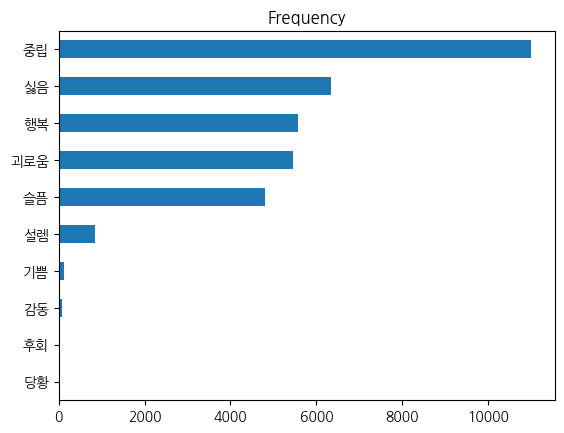

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'NanumGothic' # 한글 폰트 설정

train_df['label'].value_counts(ascending=True).plot.barh()
plt.title('Frequency')
plt.show()

In [14]:
from kobert_tokenizer import KoBERTTokenizer
tokenizer = KoBERTTokenizer.from_pretrained('skt/kobert-base-v1')

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'XLNetTokenizer'. 
The class this function is called from is 'KoBERTTokenizer'.
